In [1]:
cd kwPWRidge

/home/mattyshen/kwPWRidge


(800, 2) (800, 1)
(800, 2) (800, 1)
(800, 2) (800, 1)


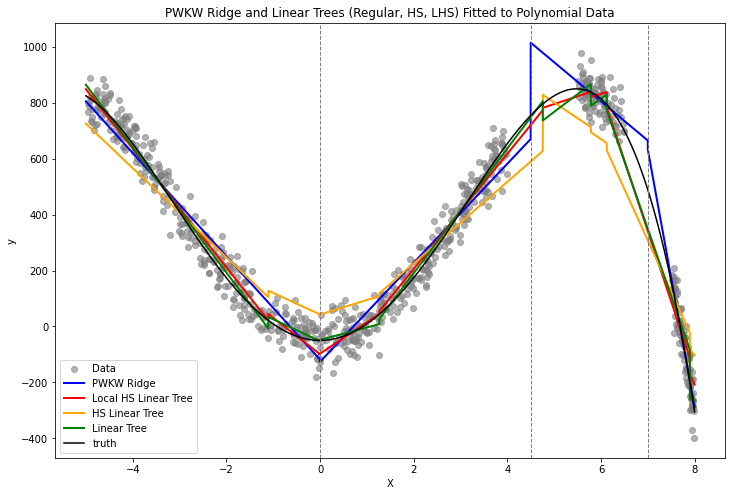

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

from itertools import product
from sklearn.model_selection import train_test_split

from models.kwpwridge import *
from models.linear_tree import LinearTree

def true_function(x):
    return -1*x**4 + 60* x**2 - 50

np.random.seed(42)

x = np.random.uniform(-5, 4, 600)
x = np.concatenate([x, np.random.uniform(5.5, 6.5, 100), np.random.uniform(7.5, 8, 100)])

y_true = true_function(x)
y_noisy = y_true + np.random.normal(0, 50, size=len(x))

split_points = [0, 4.5, 7]

model = kwPWRidgeRegressor(0.1)
lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.1, lam = 0, depth_shrink= 0)
lt_lhs = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.1, lam = 250, depth_shrink= 2)
lt_hs = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.1, lam = 250, depth_shrink= 0)
model.fit(x, y_noisy, split_points)
lt.fit(x.reshape(-1, 1), y_noisy)
lt_lhs.fit(x.reshape(-1, 1), y_noisy)
lt_hs.fit(x.reshape(-1, 1), y_noisy)

plt.figure(figsize=(12, 8))
plt.scatter(x, y_noisy, color='grey', label='Data', alpha=0.6)

space = np.linspace(-5, 8, 10000)
plt.plot(space, model.predict(space), color='blue', label='PWKW Ridge', linewidth=2)
plt.plot(space, lt_lhs.predict(space.reshape(-1, 1)), color='red', label='Local HS Linear Tree', linewidth=2)
plt.plot(space, lt_hs.predict(space.reshape(-1, 1)), color='orange', label='HS Linear Tree', linewidth=2)
plt.plot(space, lt.predict(space.reshape(-1, 1)), color='green', label='Linear Tree', linewidth=2)


x_line = np.linspace(-5, 8, 500)
y_line = true_function(x_line)
plt.plot(x_line, y_line, color="black", label="truth")

for split in split_points:
    plt.axvline(x=split, color='grey', linestyle='--', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('PWKW Ridge and Linear Trees (Regular, HS, LHS) Fitted to Polynomial Data')
plt.legend()
plt.savefig('figs/simulation_comparison.png')
plt.show()

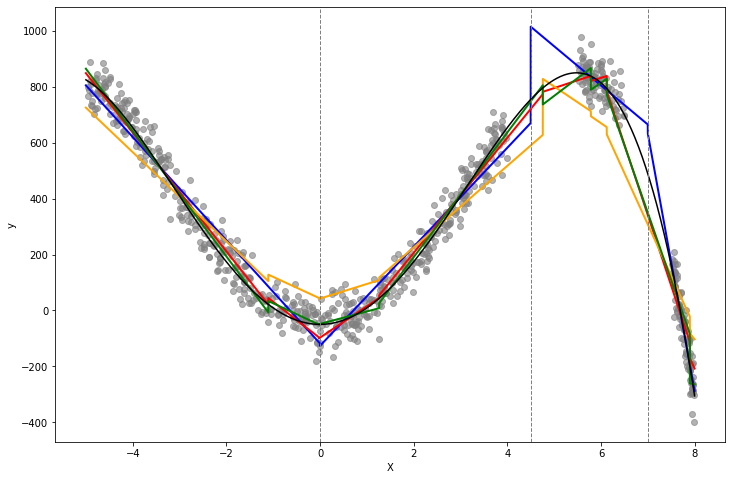

In [3]:
#Image for presentation
plt.figure(figsize=(12, 8))
plt.scatter(x, y_noisy, color='grey', label='Data', alpha=0.6)

space = np.linspace(-5, 8, 10000)
plt.plot(space, model.predict(space), color='blue', label='PWKW Ridge', linewidth=2)
plt.plot(space, lt_lhs.predict(space.reshape(-1, 1)), color='red', label='Local HS Linear Tree', linewidth=2)
plt.plot(space, lt_hs.predict(space.reshape(-1, 1)), color='orange', label='HS Linear Tree', linewidth=2)
plt.plot(space, lt.predict(space.reshape(-1, 1)), color='green', label='Linear Tree', linewidth=2)


x_line = np.linspace(-5, 8, 500)
y_line = true_function(x_line)
plt.plot(x_line, y_line, color="black", label="truth")

for split in split_points:
    plt.axvline(x=split, color='grey', linestyle='--', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
#plt.title('PWKW Ridge and Linear Trees (Regular, HS, LHS) Fitted to Polynomial Data')
#plt.legend()
plt.savefig('figs/presentation_simulation.png')
plt.show()